In [14]:
import tensorflow as tf
from tensorflow import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils import img_to_array
from keras.utils import load_img
import numpy as np
import glob
import matplotlib.pyplot as plt

In [9]:
def generate_images(model, model2, img_path):
    test_input = load_img(img_path, target_size=(256,256))
    test_input = img_to_array(test_input).reshape(1,256,256,3)
    test_input = (test_input-127.5)/127.5
    prediction = model(test_input)
    reverse = model2(prediction)
    plt.figure(figsize=(12, 12))
    display_list = [test_input[0], prediction[0], reverse[0]]
    title = ['Input Image', 'Predicted Image', 'Reverse']
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

In [10]:
gen_f = keras.models.load_model('Models/VanGogh/gen_f_vang.h5', custom_objects={'InstanceNormalization' : InstanceNormalization})
gen_g = keras.models.load_model('Models/VanGogh/gen_g_vang.h5', custom_objects={'InstanceNormalization' : InstanceNormalization})

In [15]:
test = []
for i in glob.glob("vangogh2photo/testB/*"):
    test.append(i)

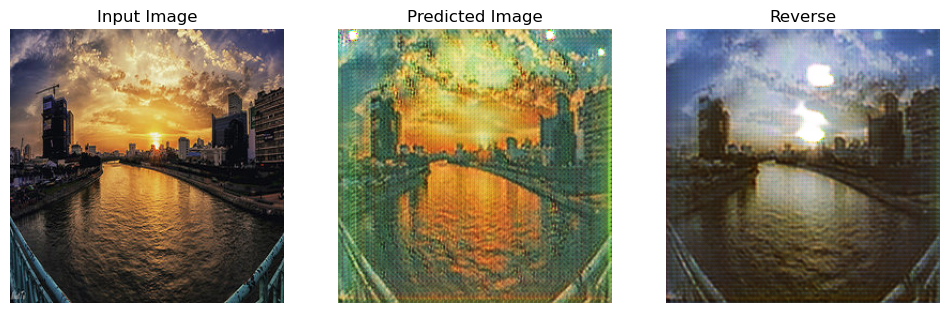

In [17]:
generate_images(gen_g, gen_f, test[0])

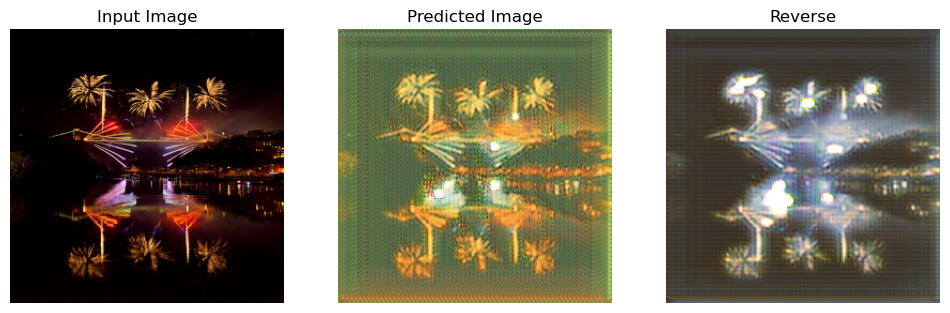

In [20]:
generate_images(gen_g, gen_f, test[500])

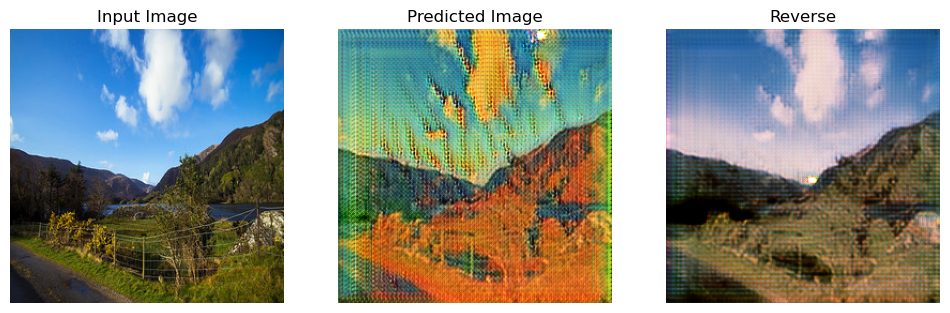

In [21]:
generate_images(gen_g, gen_f, test[139])